# Temperature prediction using Machiine Learning 

## Importing Libraries

In [36]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

### Uploading data

In [2]:
weather = pd.read_csv("weatherdata.csv", index_col="DATE")

### Explorating data

In [3]:
weather.head()### Uploading data

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row corresponds to a day, with the data collected for different weather measures of that day.

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19655 entries, 1970-01-01 to 2023-10-24
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19655 non-null  object 
 1   NAME     19655 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14539 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19654 non-null  float64
 8   SNOW     19654 non-null  float64
 9   SNWD     19653 non-null  float64
 10  TAVG     6532 non-null   float64
 11  TMAX     19654 non-null  float64
 12  TMIN     19654 non-null  float64
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     10037 non-null  float64
 16  WDF5     9954 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

We have to cualitative features, the rest are numerical

## Data Cleaning

### Checking duplicated data

In [5]:
weather.duplicated().any()

False

### Checking and treating missing values

% of null values per column

In [6]:
null_review = weather.apply(pd.isnull).sum()/weather.shape[0]
null_review

STATION    0.000000
NAME       0.000000
ACMH       0.510811
ACSH       0.510761
AWND       0.260290
FMTM       0.484915
PGTM       0.375782
PRCP       0.000051
SNOW       0.000051
SNWD       0.000102
TAVG       0.667667
TMAX       0.000051
TMIN       0.000051
TSUN       0.998423
WDF1       0.511015
WDF2       0.489341
WDF5       0.493564
WDFG       0.739456
WDFM       0.999949
WESD       0.691122
WSF1       0.510862
WSF2       0.489341
WSF5       0.493615
WSFG       0.620300
WSFM       0.999949
WT01       0.629763
WT02       0.935080
WT03       0.932791
WT04       0.982549
WT05       0.981481
WT06       0.990791
WT07       0.994505
WT08       0.799339
WT09       0.992877
WT11       0.999288
WT13       0.888832
WT14       0.954872
WT15       0.997863
WT16       0.665378
WT17       0.996947
WT18       0.940626
WT19       0.999949
WT21       0.999746
WT22       0.997507
WV01       0.999949
dtype: float64

We have many columns with missing values. This could mean that someone forgot to write down some data, that some sensors were malcfunctioning that day, or that some sensors just were not installed in that date (for example in the 70's or 80's).

#### We are going to remove any column where the null percentage is too high (we will only keep columns with < 5% null values)

In [7]:
valid_columns = weather.columns[null_review < 0.05]

In [8]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

#### Updating our dataset so itonly contains these valid columns

In [9]:
weather = weather[valid_columns].copy()
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0
...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0


In [10]:
null_review = weather.apply(pd.isnull).sum()/weather.shape[0]
null_review

STATION    0.000000
NAME       0.000000
PRCP       0.000051
SNOW       0.000051
SNWD       0.000102
TMAX       0.000051
TMIN       0.000051
dtype: float64

#### Lowercasing all our column names

In [11]:
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0
...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0


#### Treating remaining missing values

In [12]:
#We are gonna use ffill. this looks for a NaN, then looks at the last nonNan and uses it to fill the Nan.
#For example, If snow depth was 0 yesterday, it is more likely that today is also gonna be 0

In [13]:
weather = weather.ffill()

In [14]:
null_review = weather.apply(pd.isnull).sum()
null_review

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

#### Making sure our columns data types are adecuate for our machine learning model

In [15]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

Right now station and name are strings (objects). The others are numerical.

#### We also want to check index (row labels)

In [16]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
       '2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24'],
      dtype='object', name='DATE', length=19655)

So right now our index is a string type. We are gonna convert it to date type so we can better use it in the next steps

In [17]:
weather.index = pd.to_datetime(weather.index)

In [18]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
               '2023-10-23', '2023-10-24'],
              dtype='datetime64[ns]', name='DATE', length=19655, freq=None)

Now we can interact much better with it. For example, we can get only the year data from our dates:

In [19]:
weather.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=19655)

#### Checking if we have any gaps in our data
Counting how many rows we have for each year and sorting it by year 

In [20]:
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    297
Name: count, dtype: int64

Let's  plot some columns to confirm the above results and that we have no gaps

<Axes: xlabel='DATE'>

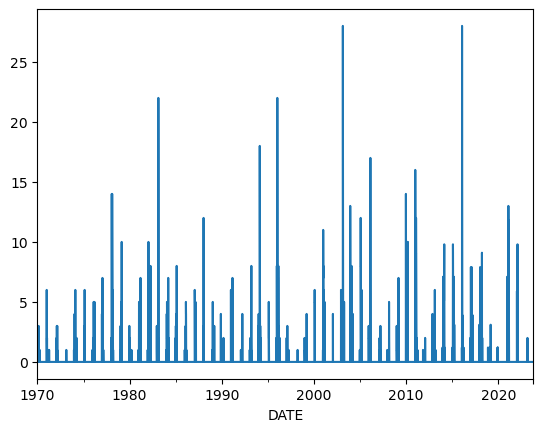

In [21]:
weather['snwd'].plot()

### Machine Learning Algorithm
We need to tell what are we trying to predict: in this case, tomorrow's temperature.

In [22]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0
...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0


We have 2 variables related to temperature, both in Farenheit:
    tmax: maximum temperature on that given day
    tmin: minumum temperature on that given day

#### We are going to try to predict tomorrow's tmax

To do so, we are going to create our target column using the shift method. This keeps the same index but it pulls de values from the next row back

In [23]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0,36.0
...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0


So right now we have no data for october 25th, that's why we have a Nan Value in our last row. It is not actually missing.

Typically we handle this situations differently. But in this occasion, to make it simplier, we are gonna use the ffill method again.

In [24]:
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0,36.0
...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0


#### Applying a Ridge Regression Model
It works very similarly to linear regression, but penalizes coefficients to account for multi-collinearity. To some extent, helps adjusting for collinearity

1st we are gonna check for collinearity anyways

In [25]:
weather.select_dtypes(include=['float64', 'int64']).corr()

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.147869,0.001058,-0.007305,0.052601,-0.002911
snow,0.147869,1.000000,0.232815,-0.174145,-0.158365,-0.171832
snwd,0.001058,0.232815,1.000000,-0.258259,-0.255231,-0.239578
tmax,-0.007305,-0.174145,-0.258259,1.000000,0.955205,0.915109
tmin,0.052601,-0.158365,-0.255231,0.955205,1.000000,0.915189
target,-0.002911,-0.171832,-0.239578,0.915109,0.915189,1.000000


In [26]:
rr = Ridge(alpha=0.1)
# the parameter alpha controls how much the coefficients are shrunk to account for collinearity. we can experiment with it. 0.1 is a good default value 

Now we need to apply the ridge regression model. To do that we need to do 2 things:
    1-Create a list of predictor columns
    2-Divide our dataset into training and test sets

In [27]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

####  We have to keep in mind that our data is a time series type of data (it is in order of date, since the temp of the next day is related to the temp of the previous day)

When you try to estimate the error of a machine learning model, you can use cross-validation EXCEPT with time series data.
In such a case, we need to be really careful not to use future data to predict the past. 
#### So we need to use a special technique called back testing or Time Series Cross-validation

In [58]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
    
        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis = 1)
    
        combined.columns = ["actual", "prediction"]
    
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
    
        all_predictions.append(combined)
    return pd.concat(all_predictions) #this returns all df predictions(of 90 days) into a very long df all together

#start in this case is 10 years of data (365 days x 10 = 10 years) before we start making predictions. 
#this is gonna generate predictions for our data, except for the 1st 10 years, in steps of 90 days.
#then we create a list, where each element in the list is gonna be a df that has predictions for 90 days
#we create a forloop (start previously fixed, .shape[0] is the end of our data set). At each iteration we create a training set
#training sets are going to be all of the rows in our data up to row i,  its going to take all the data that comes before the current row
#for the test set, is going to take the data from the next 90 days
#then we fit the model to the data in the training set, using the predictors
#and then generate our predictions passing our predictors from the test set 
# preds = model.predict(test[predictors]) by default this returns a numpy array. we are gonna change it to make our predictions a little bit nicer
#then we concatenate our real test data in with our predictions

#### Now that we have the backtest function, we can actually make predictions by calling our function

In [34]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2023-10-20,66.0,68.571591,2.571591
2023-10-21,61.0,68.599940,7.599940
2023-10-22,62.0,61.344336,-0.655664


In [ ]:
#### Now that we have the backtest function, we can actually make predictions by calling our function

### Checking model accuracy

In [40]:
model_MAE = mean_absolute_error(predictions['actual'], predictions["prediction"])
model_MAE

5.1347971958441745

#### On average we are over 5 degrees off from the actual temperature, not a great accuracy.

# Improving our model
#### We will calculate the average temperature and precipitation in the past few days(3 days and 14 days) and looking at how the current day compares to those days. This will help if for some reason the temp of a given day is odd

In [45]:
def pct_diff(old, new):
    return (new - old) / old #this calculates the % diff between 2 values

#the next function will help us find those rolling averages for the past few periods.
#a rolling average or mean, it takes the last X rows before the current row and compute the average of a column across all of those rows.
#horizon is thenumber of days we wanna compute the rolling average
#col is the column name we wanna compute the rolling average on
    #then we create a label that is a string that is the name of the new column we are gonna create on our df.
    
  
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"#so for example if we were finding the rolling average for the las 14 days, this would turn into rolling underscore 14 underscore tmax
    weather[label] = weather[col].rolling(horizon).mean()#then we take this label and make it into a new colum, which is going to be weather[col]
    weather[f"{label}_pct"] = pct_diff(weather[label] , weather[col]) #and then we also find the percentage diff between the current day and the rolling mean
    return weather

#now we can try this with different horizons and iterating on different columns

rolling_horizon = [3, 14]

for horizon in rolling_horizon:
    for col in ["tmax", "tmin","prcp"]:
        weather = compute_rolling(weather, horizon, col)
                     
    
#this will add a bunch of new columns to our weather df  

weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0,64.333333,-0.005181,53.333333,0.125000,0.223333,2.000000,64.071429,-0.001115,50.857143,0.179775,0.240000,1.791667
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0,64.666667,0.020619,55.666667,0.023952,0.263333,-0.544304,64.000000,0.031250,51.071429,0.116084,0.114286,0.050000
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0,63.666667,-0.041885,54.666667,-0.140244,0.263333,-1.000000,64.000000,-0.046875,50.857143,-0.075843,0.114286,-1.000000


#### So again we have some Nan values, that's beacuse for some given days we don't have 3 or 14 previous dats to work with. This time we are simply going to remove the 1st 14n rows.

In [47]:
weather = weather.iloc[14:,:]
weather
#this code would do the same: weather = weather.drop(weather.iloc[:14,:])

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29.0,13.0,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,NaN,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36.0,21.0,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,NaN,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43.0,30.0,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.000000,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42.0,25.0,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.500000,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,16.0,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.000000,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0,64.333333,-0.005181,53.333333,0.125000,0.223333,2.000000,64.071429,-0.001115,50.857143,0.179775,0.240000,1.791667
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0,64.666667,0.020619,55.666667,0.023952,0.263333,-0.544304,64.000000,0.031250,51.071429,0.116084,0.114286,0.050000
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0,63.666667,-0.041885,54.666667,-0.140244,0.263333,-1.000000,64.000000,-0.046875,50.857143,-0.075843,0.114286,-1.000000


#### We still have some missing values in the % columns. this happens when we're dividing by 0 or dividing 0. 
We are going to use fill.na(0). 

In [49]:
weather = weather.fillna(0)
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29.0,13.0,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,0.000000,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36.0,21.0,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,0.000000,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43.0,30.0,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.000000,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42.0,25.0,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.500000,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,16.0,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.000000,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0,64.333333,-0.005181,53.333333,0.125000,0.223333,2.000000,64.071429,-0.001115,50.857143,0.179775,0.240000,1.791667
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0,64.666667,0.020619,55.666667,0.023952,0.263333,-0.544304,64.000000,0.031250,51.071429,0.116084,0.114286,0.050000
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0,63.666667,-0.041885,54.666667,-0.140244,0.263333,-1.000000,64.000000,-0.046875,50.857143,-0.075843,0.114286,-1.000000


### Adding more predictors to the model

In [50]:
def expand_mean(df):
    return df.expanding(1).mean()#this is looking at each row in the data, take all previous rows and that given row and return the mean of all of those rows together

for col in ["tmax", "tmin","prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys = False).apply(expand_mean) #this only takes data from the past, where we already have information. otherwise it would be biased info
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys = False).apply(expand_mean)

In [51]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29.0,13.0,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36.0,21.0,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43.0,30.0,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42.0,25.0,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25.0,16.0,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0,64.333333,-0.005181,...,50.857143,0.179775,0.240000,1.791667,64.862898,62.685185,50.250752,48.685185,0.115268,0.202778
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0,64.666667,0.020619,...,51.071429,0.116084,0.114286,0.050000,64.863582,63.518519,50.254808,48.037037,0.115270,0.079815
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0,63.666667,-0.041885,...,50.857143,-0.075843,0.114286,-1.000000,64.861261,63.537037,50.252853,48.592593,0.115201,0.102963


#### Now that we've added more predictors, we can re-run our model

In [52]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [60]:
predictions = backtest(weather, rr, predictors)

In [61]:
model2_MAE = mean_absolute_error(predictions['actual'], predictions["prediction"])
print(model_MAE)
print(model2_MAE)

5.1347971958441745
4.7882359240732715


In [62]:
predictions.sort_values("diff",  ascending = False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.361065,30.638935
2007-03-26,78.0,49.965413,28.034587
1998-03-26,80.0,51.966675,28.033325
2003-04-15,86.0,59.432179,26.567821
1985-04-18,84.0,58.425960,25.574040
...,...,...,...
1987-09-16,75.0,75.001185,0.001185
1984-08-10,83.0,82.999179,0.000821
2011-09-25,78.0,77.999237,0.000763


In [63]:
weather.loc["1990-03-07":"1990-03-17",:]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32.0,14.0,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39.0,20.0,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43.0,29.0,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47.0,39.0,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59.0,41.0,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59.0,43.0,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85.0,41.0,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62.0,46.0,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55.0,43.0,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


#### We can see that there are some data that, with the actual information we have, would be hard to predict. We might need more detailed atmospheric data about wind conditions or parametric pressure, cloud cover, etc. 

<Axes: xlabel='diff'>

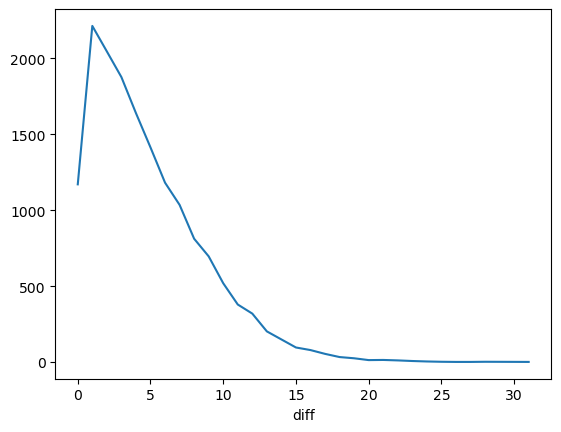

In [70]:
predictions["diff"].round().value_counts().sort_index().plot()

#### We can see that there is a "tail" where high errors are taking place, values that are being hard to predict.

# Conclusions

We have built a model, and improved it's accuracy with some modifications. We have taken some diagnostics to see what might be happening.

### Further steps
    1-Add more predictor columns
    2-Trying different horizons or diff types of rolling predictors
    3-Reviewing all the colums that had Nan values which were removed when data cleaning.
    4-Changing the technic. We used Ridge Regression, but we could use XGBOOST or random forest that might perform better.